# Student Intervention System – EIACD Assignment 2

This project addresses the task of building a machine learning pipeline to predict whether a student will pass or fail in school. The dataset used comes from the UCI Machine Learning Repository and contains demographic, academic, and social data collected from Portuguese secondary school students.

The main goal is to develop a system that can identify students at risk of failure, enabling timely educational interventions. The process involves data exploration, cleaning, preprocessing, supervised learning, model evaluation, and interpretation of results.


In [78]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("student-data.csv")

# Basic info
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:\n")
print(df.info())

# Preview the first few rows
df.head()


Shape of the dataset: (395, 31)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


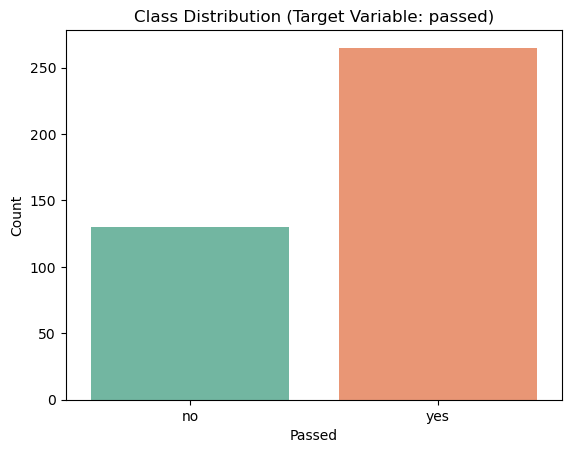

passed
yes    0.670886
no     0.329114
Name: proportion, dtype: float64


In [82]:
# Class distribution
sns.countplot(data=df, x='passed', palette='Set2', hue='passed')
plt.title("Class Distribution (Target Variable: passed)")
plt.xlabel("Passed")
plt.ylabel("Count")
plt.show()

# Check balance
print(df['passed'].value_counts(normalize=True))

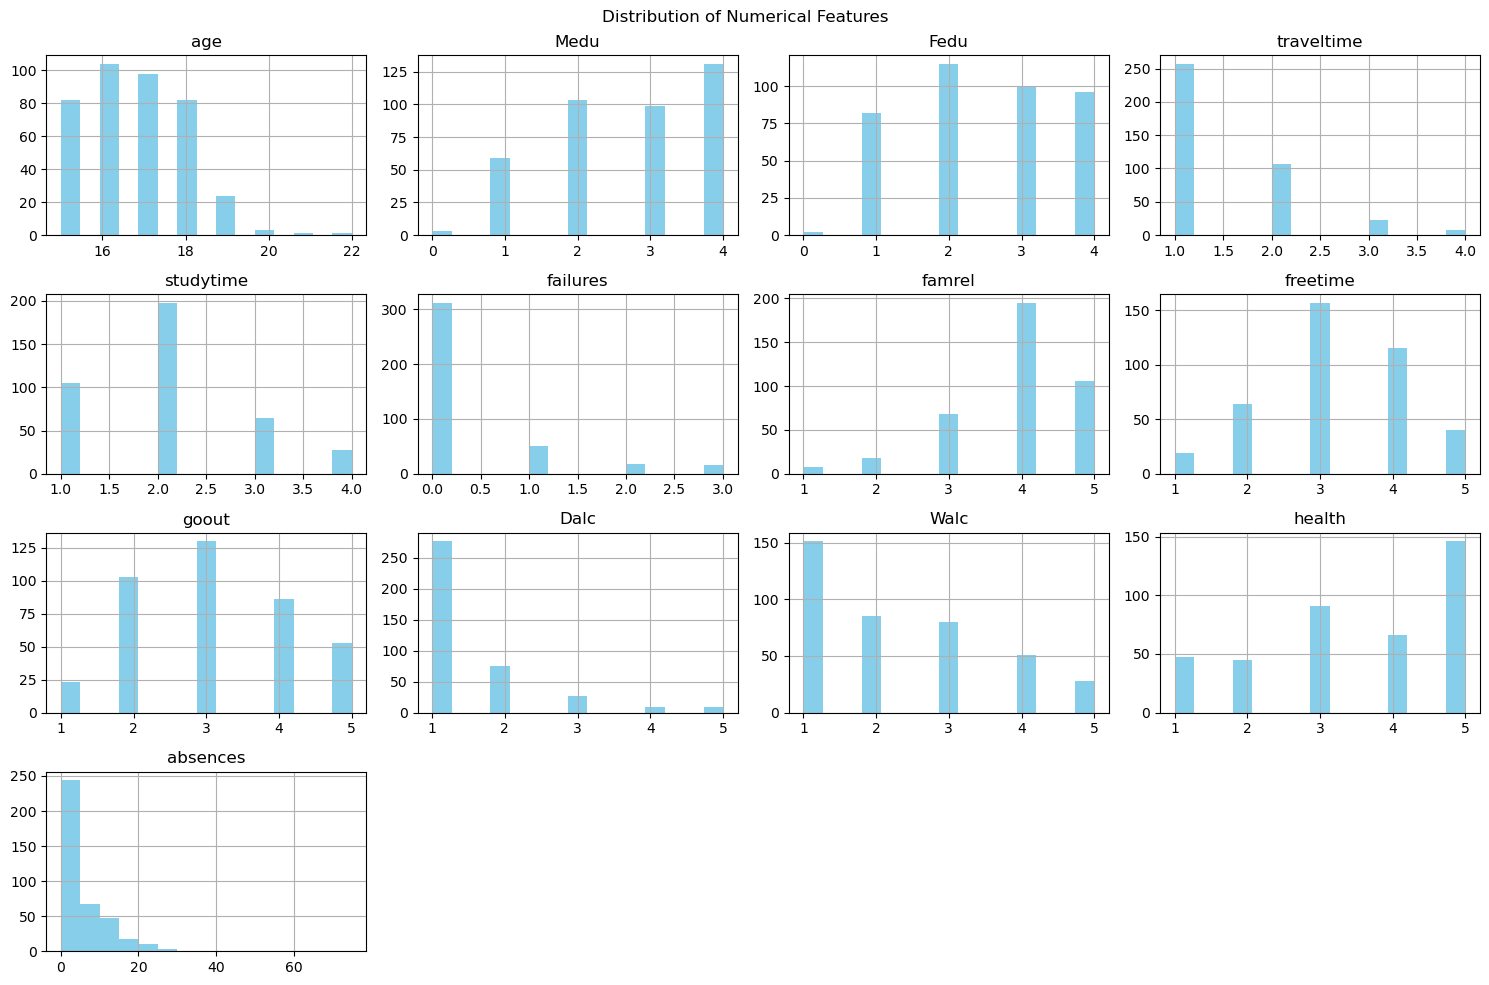

In [83]:
# Select numerical features
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns

# Histograms for numeric features
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(4, 4), color="skyblue")
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


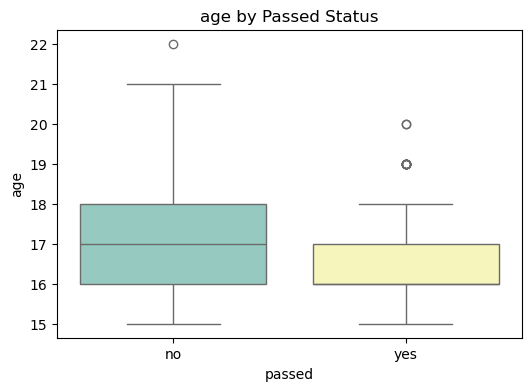

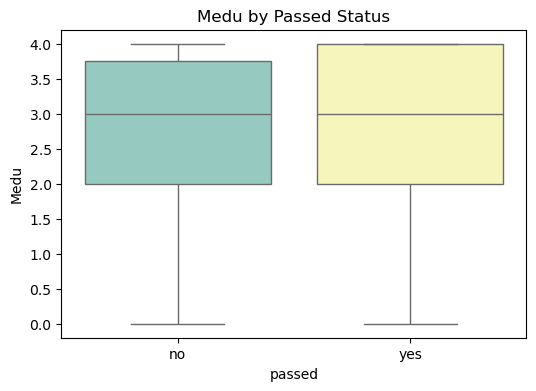

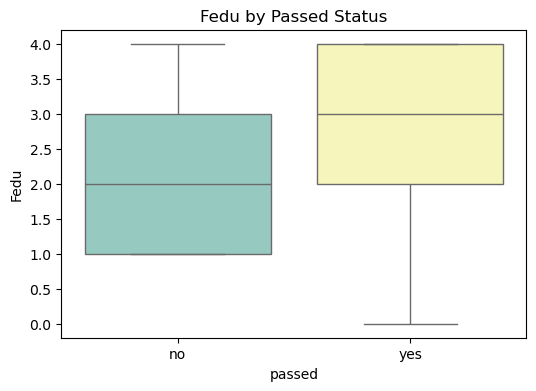

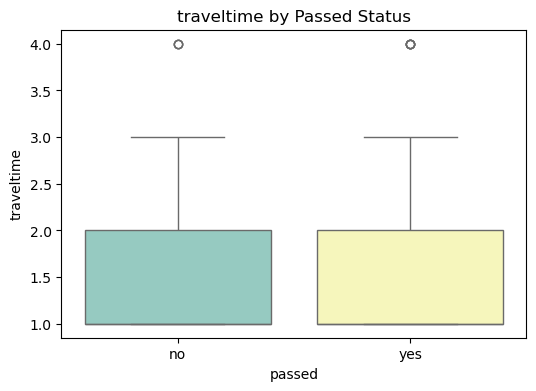

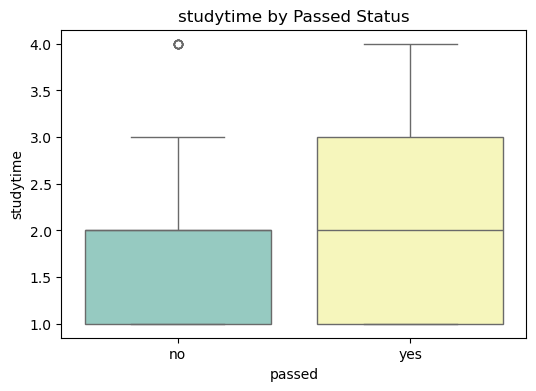

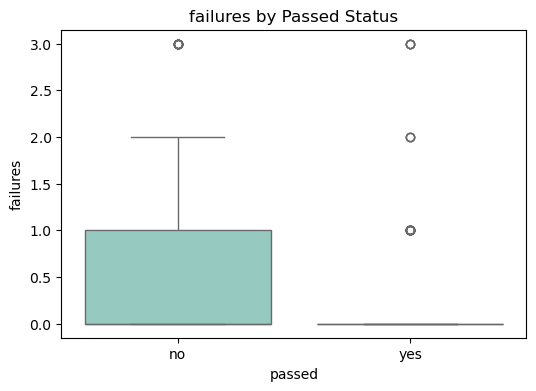

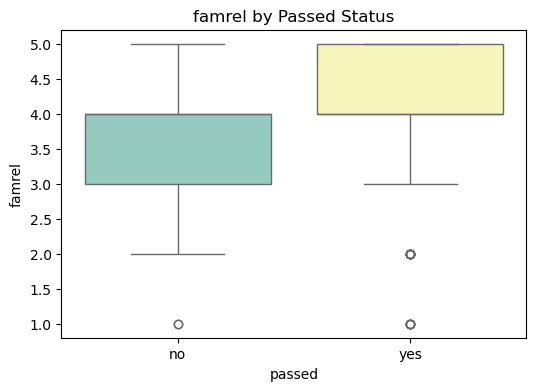

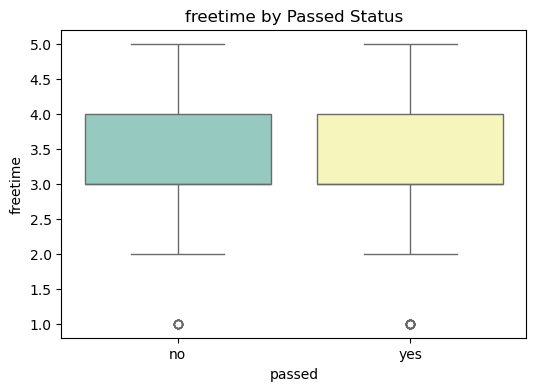

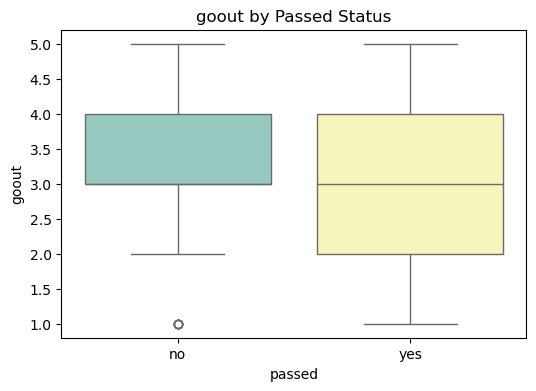

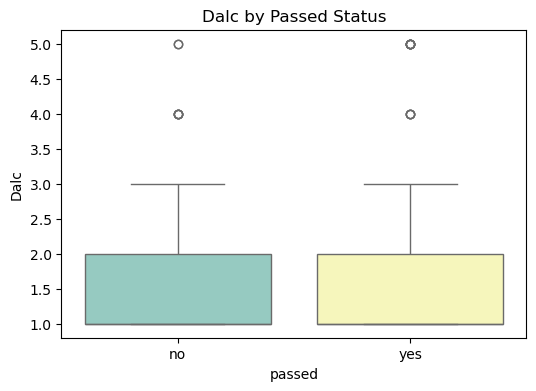

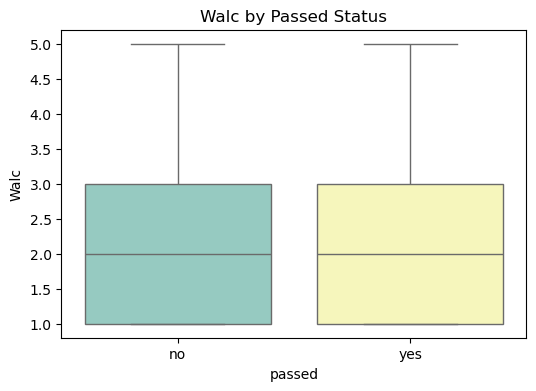

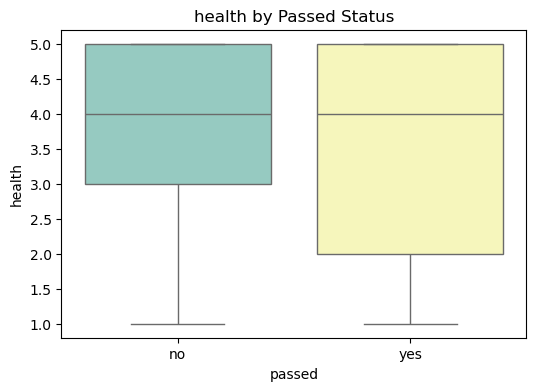

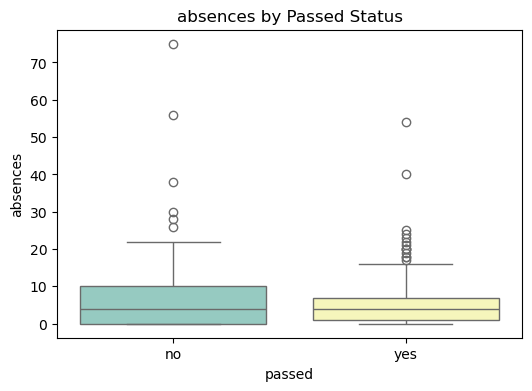

In [85]:
# Boxplots for each numerical feature by 'passed'
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="passed", y=col, palette="Set3", hue='passed')
    plt.title(f"{col} by Passed Status")
    plt.show()

In [93]:
# Crosstab: % of students with each failure count, by passed status
failures_ct = pd.crosstab(df["failures"], df["passed"], normalize="columns") * 100
failures_ct = failures_ct.round(1).astype(str) + '%'

# Display table
print("Distribution of failures by passed status (in %):")
display(failures_ct)


Distribution of failures by passed status (in %):


passed,no,yes
failures,,
0,60.0%,88.3%
1,20.0%,9.1%
2,10.8%,1.1%
3,9.2%,1.5%


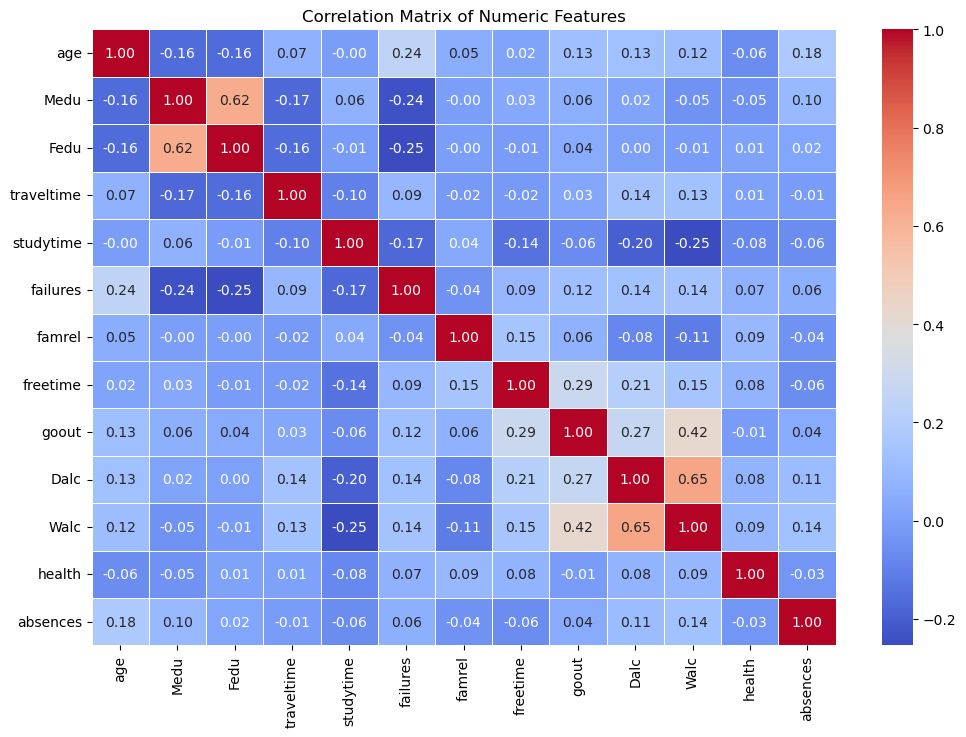

In [86]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## Observations from the EDA

- The dataset contains 395 entries and 31 features.
- The target variable `passed` is imbalanced: approximately 67% of students passed and 33% failed.
- Some features (e.g., `failures`, `studytime`, `absences`) show noticeable differences between students who passed and failed.
- The correlation matrix suggests that most numeric variables are weakly correlated with each other, but some mild relationships are worth exploring further.
- Outliers may be present in the `absences` feature, with values as high as 75.

These insights will guide the next steps: feature selection, preprocessing, and choosing suitable models.
